# RhizoScan Pipeline

This pipeline is a step by step pipeline

## Common import

In [1]:
%pylab inline
from matplotlib import pyplot as plt
from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


## RhizoScan Import

In [2]:
from rhizoscan import get_data_path
from rhizoscan.root.pipeline import load_image, detect_petri_plate, compute_graph, compute_tree
from rhizoscan.root.pipeline.arabidopsis import segment_image, detect_leaves
from rhizoscan.root.graph.mtg import tree_to_mtg

## RSA Image

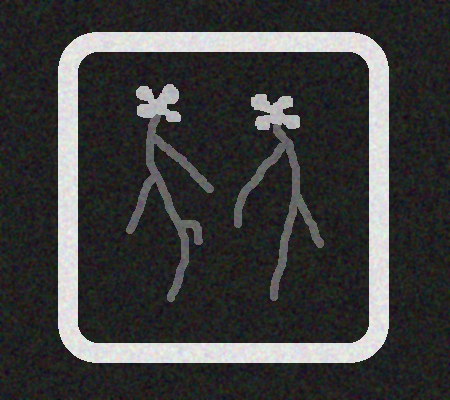

In [3]:
image_filename = get_data_path('pipeline/arabido.png')
Image(image_filename)

### Load Image

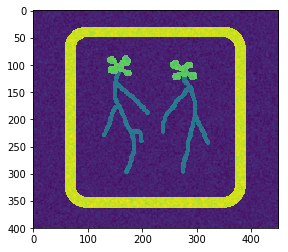

In [4]:
image = load_image(image_filename)
imshow(image)

### Detect features (Petri plate)

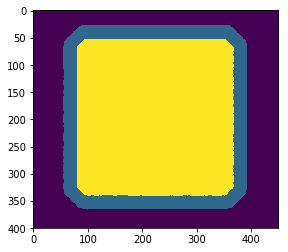

In [5]:
pmask, px_scale, hull = detect_petri_plate(image,border_width=25, plate_size=120, fg_smooth=1)
imshow(pmask)

### Image Segmentation

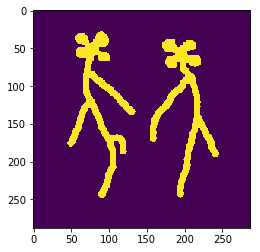

In [6]:
rmask, bbox = segment_image(image,pmask,root_max_radius=5)
imshow(rmask)

### Detect leaves and seed

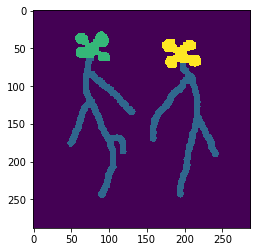

In [16]:
seed_map = detect_leaves(rmask, image, bbox, plant_number=2, leaf_bbox=[0,0,1,.4])
#imshow(seed_map)
imshow(seed_map+rmask)

### Compute the graph corresponding to the RSA

In [14]:
print rmask.shape, rmask.dtype
print seed_map.shape, seed_map.dtype
print bbox

(288L, 287L) bool
(288L, 287L) uint8
(slice(54L, 342L, None), slice(80L, 367L, None))


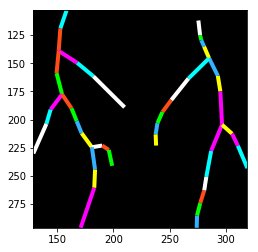

In [13]:
graph = compute_graph(rmask,seed_map,bbox)
graph.plot(linewidth=4)

### Extract a tree from the graph

/home/artzet_s/PycharmProjects/Rhizo/rhizoscan/src/rhizoscan/root/graph/nsa.py:307: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif ids=='auto': self.setdefault('id',_np.arange(self.number()))
/home/artzet_s/PycharmProjects/Rhizo/rhizoscan/src/rhizoscan/root/graph/__init__.py:196: RuntimeWarning: divide by zero encountered in divide
  shifty  = _np.arange(len(axe_node))/ms % (2*ms+1) - ms


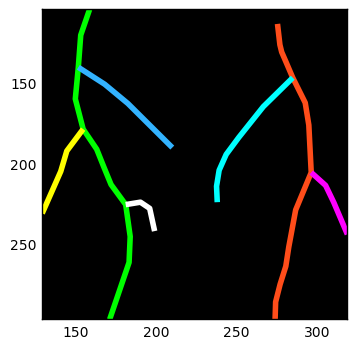

In [9]:
tree = compute_tree(graph, px_scale=px_scale)
tree.plot(linewidth=4)

### Save the RSA into an MTG

In [10]:
g = rsa = tree_to_mtg(tree)
g.display()

MTG : nb_vertices=54, nb_scales=4
/P			(id=1)											
^/A			(id=3)											
^/S			(id=4)											
^<S			(id=5)											
^<S			(id=6)											
	+A			(id=38)										
	^/S			(id=39)										
	^<S			(id=40)										
	^<S			(id=41)										
^<S			(id=7)											
^<S			(id=8)											
	+A			(id=42)										
	^/S			(id=43)										
	^<S			(id=44)										
	^<S			(id=45)										
^<S			(id=9)											
^<S			(id=10)											
^<S			(id=11)											
^<S			(id=12)											
	+A			(id=50)										
	^/S			(id=51)										
	^<S			(id=52)										
	^<S			(id=53)										
^<S			(id=13)											
^<S			(id=14)											
^<S			(id=15)											
/P			(id=2)											
^/A			(id=16)											
^/S			(id=17)											
^<S			(id=18)											
^<S			(id=19)											
^<S			(id=20)											
^<S			(id=21)											
	+A			(id=31)										
	^/S			(id=32)										
	^<S			(id=33)										
	^<S			(id=34)										
	^<S			(id=35)										
	^<S			(id=36)										
	^<S		